In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
ds = pd.read_csv('/content/mcu_box_office.csv')

In [ ]:
ds.head(5)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [ ]:
ds.shape

(27, 10)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


In [ ]:
ds.describe()

,mcu_phase,tomato_meter,audience_score,movie_duration
count,27.000000,27.000000,27.000000,27.000000
mean,2.481481,83.555556,83.740741,131.925926
std,1.014145,11.112479,11.002072,15.531422
min,1.000000,47.000000,45.000000,111.000000
25%,2.000000,79.000000,78.000000,122.500000
50%,3.000000,87.000000,87.000000,130.000000
75%,3.000000,91.500000,91.000000,138.000000
max,4.000000,96.000000,98.000000,181.000000


In [ ]:
ds.isna().any()

movie_title             False
mcu_phase               False
release_date            False
tomato_meter            False
audience_score          False
movie_duration          False
production_budget       False
opening_weekend         False
domestic_box_office     False
worldwide_box_office    False
dtype: bool

In [ ]:
ds['production_budget'] = ds['production_budget'].str.split(
    ',').str.join("").astype(float)

In [ ]:
ds['opening_weekend'] = ds['opening_weekend'].str.split(
    ',').str.join("").astype(float)
ds['domestic_box_office'] = ds['domestic_box_office'].str.split(
    ',').str.join("").astype(float)
ds['worldwide_box_office'] = ds['worldwide_box_office'].str.split(
    ',').str.join("").astype(float)


In [ ]:
ds['production_budget']

0     186000000.0
1     137500000.0
2     170000000.0
3     150000000.0
4     140000000.0
5     225000000.0
6     200000000.0
7     150000000.0
8     170000000.0
9     170000000.0
10    365000000.0
11    130000000.0
12    250000000.0
13    165000000.0
14    200000000.0
15    175000000.0
16    180000000.0
17    200000000.0
18    300000000.0
19    130000000.0
20    175000000.0
21    400000000.0
22    160000000.0
23    200000000.0
24    150000000.0
25    200000000.0
26    200000000.0
Name: production_budget, dtype: float64

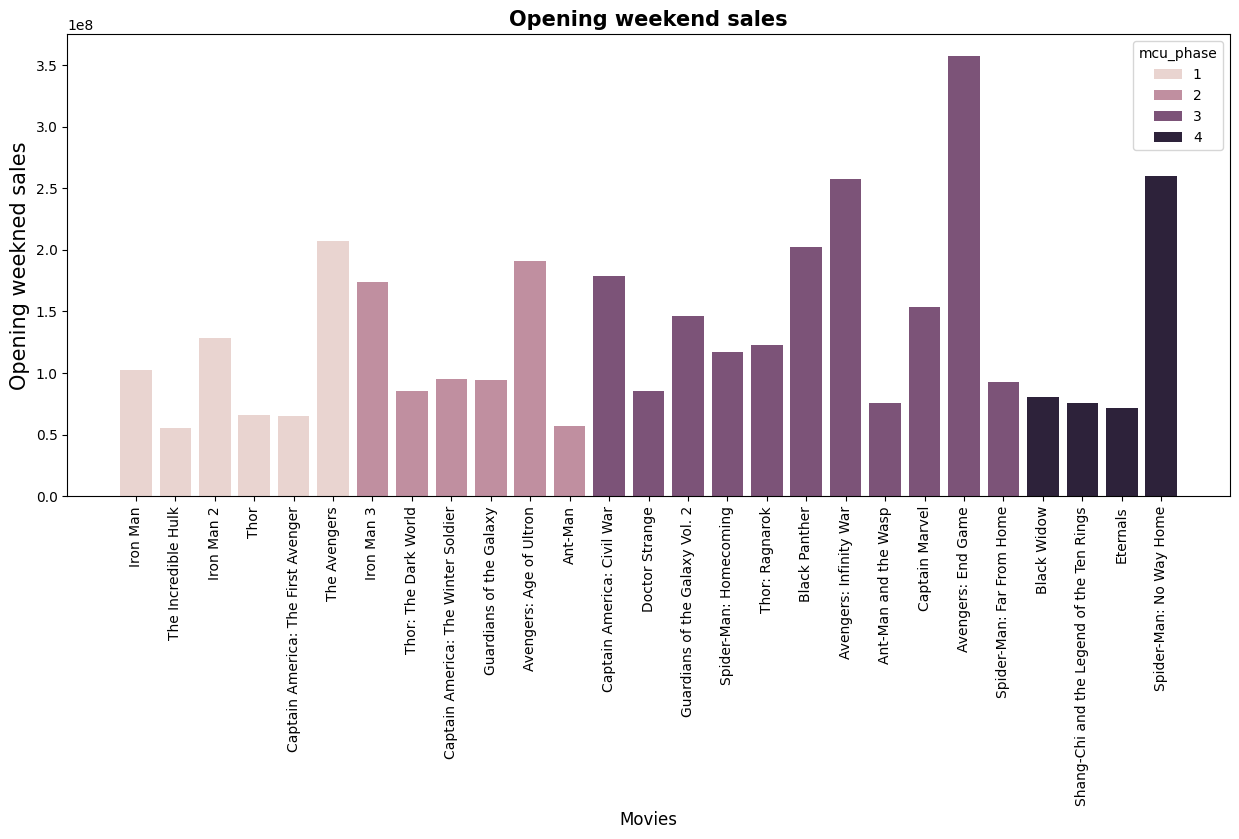

In [ ]:
plt.figure(figsize =(15,6))
plt.xticks(rotation = 90)
sns.barplot(x="movie_title", y="opening_weekend",
            data=ds, hue="mcu_phase", dodge=False)
plt.title("Opening weekend sales", fontsize = 15, fontweight = "bold")
plt.xlabel("Movies", fontsize = 12)
plt.ylabel("Opening weekned sales",fontsize = 15)
plt.vlines(x=(5.5, 11.5, 22.5), ymin=0, ymax=110)



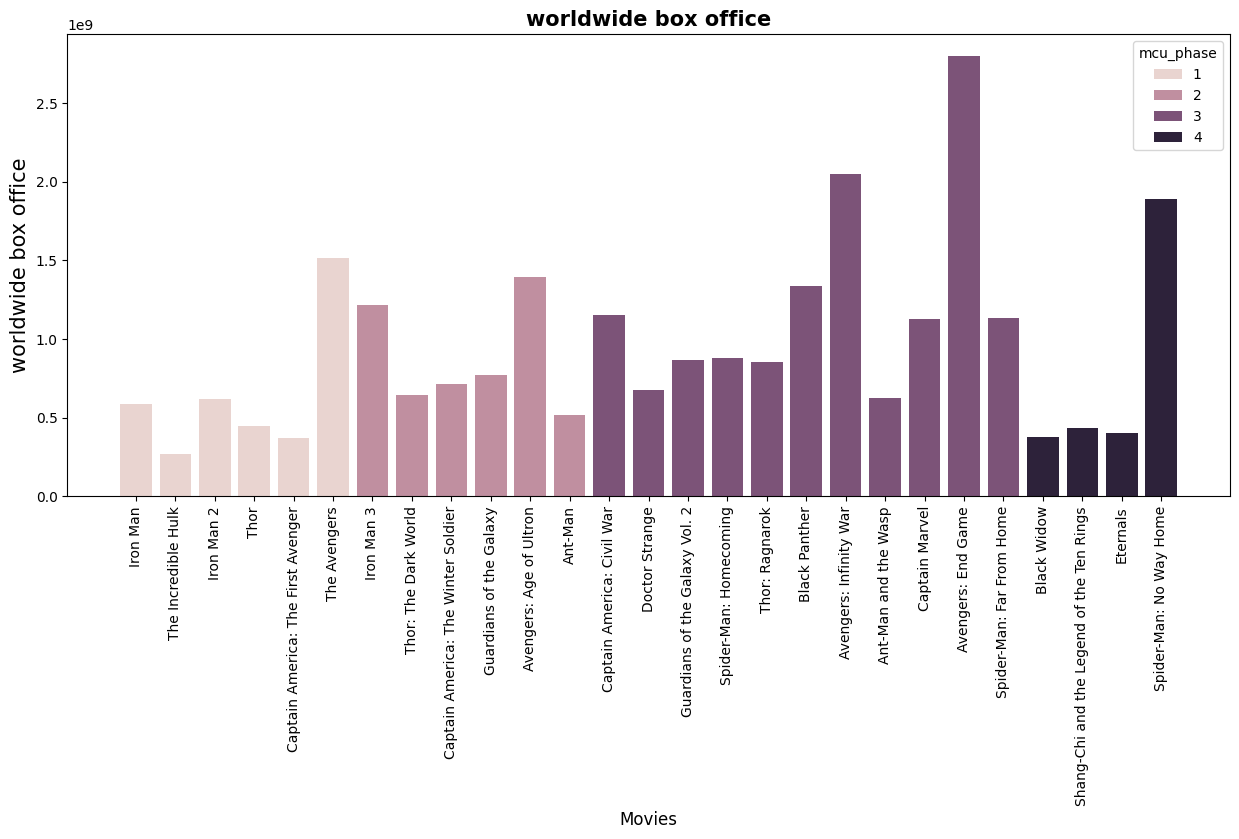

In [ ]:
plt.figure(figsize =(15,6))
plt.xticks(rotation = 90)
sns.barplot(x="movie_title", y="worldwide_box_office",
            data=ds, hue="mcu_phase", dodge=False)
plt.title("worldwide box office", fontsize = 15, fontweight = "bold")
plt.xlabel("Movies", fontsize = 12)
plt.ylabel("worldwide box office",fontsize = 15)
plt.vlines(x=(5.5, 11.5, 22.5), ymin=0, ymax=110)



In [ ]:
budget = pd.melt(ds, id_vars=("movie_title", "mcu_phase"), value_vars=(
    "production_budget", "worldwide_box_office"), value_name="budget_value", var_name="budget_type")



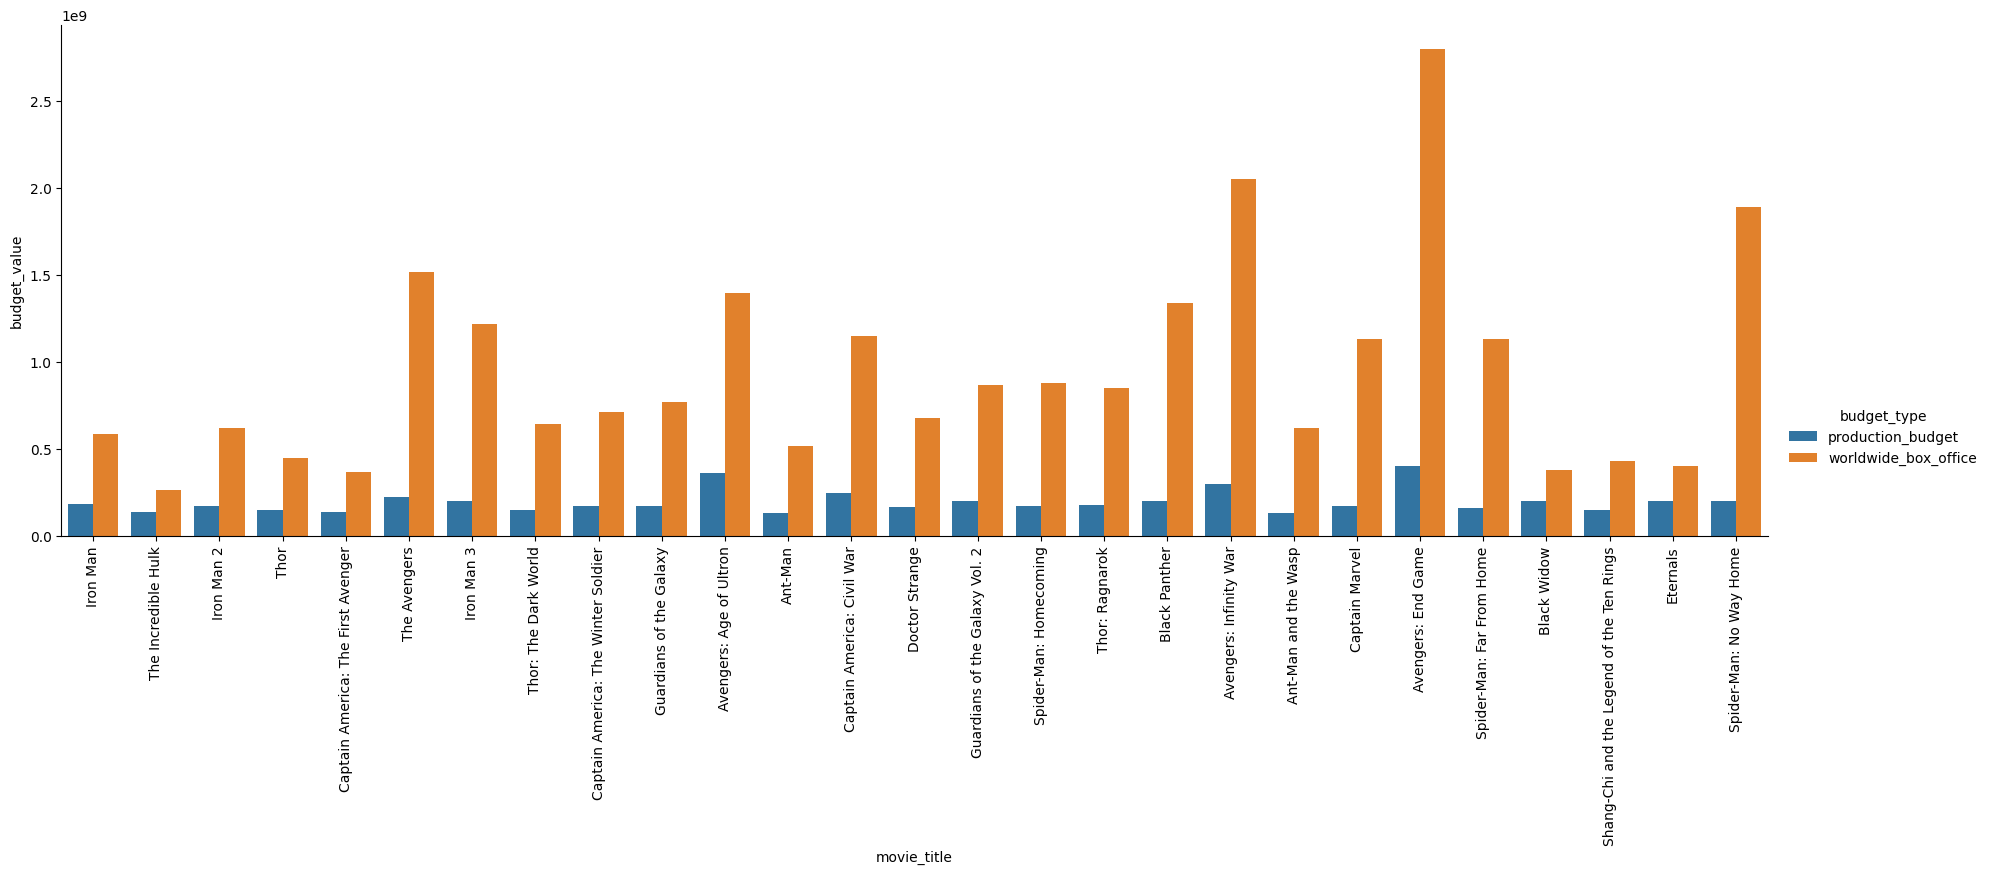

In [ ]:
g = sns.catplot(x="movie_title", y="budget_value",
                data=budget, hue="budget_type", kind="bar", dodge=True, sharex=False, aspect=3, height=6)
g.set_xticklabels(rotation = 90)


In [ ]:
ds.head(1)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,186000000.0,102118668.0,318604126.0,585171547.0


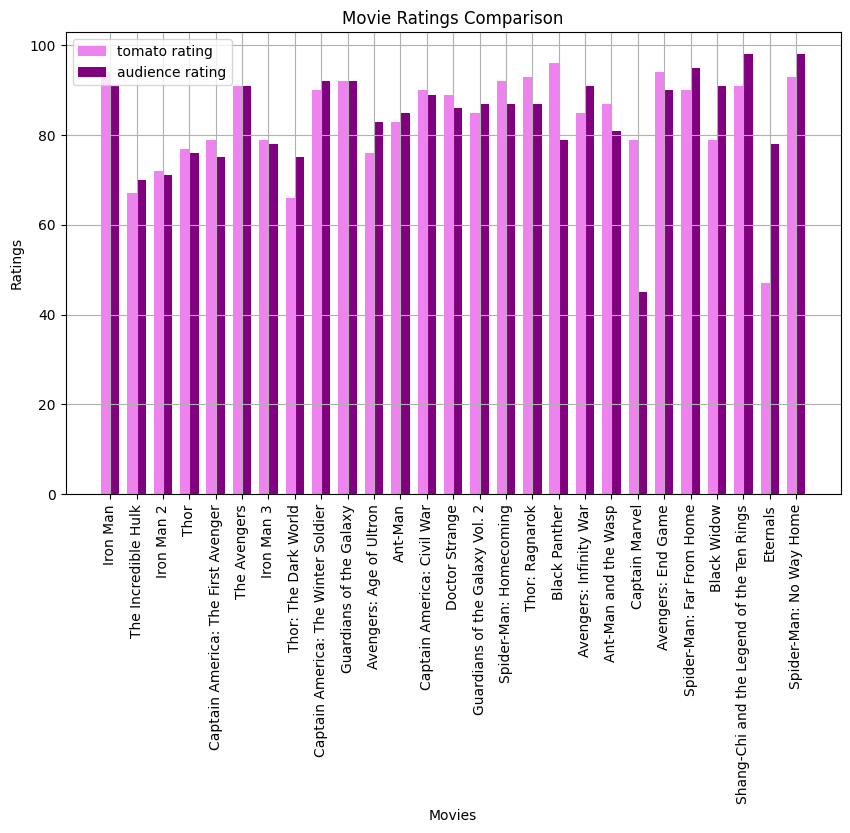

In [ ]:
movies=ds['movie_title']
trating=ds['tomato_meter']
arating=ds['audience_score']

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(movies))

plt.bar(index, trating, bar_width, label='tomato rating', color='violet')
plt.bar([i + bar_width for i in index], arating, bar_width, label='audience rating', color='purple')

# Adding labels and title
plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.title('Movie Ratings Comparison')
plt.xticks([i + bar_width / 2 for i in index], movies, rotation=90)
plt.legend()
plt.grid()




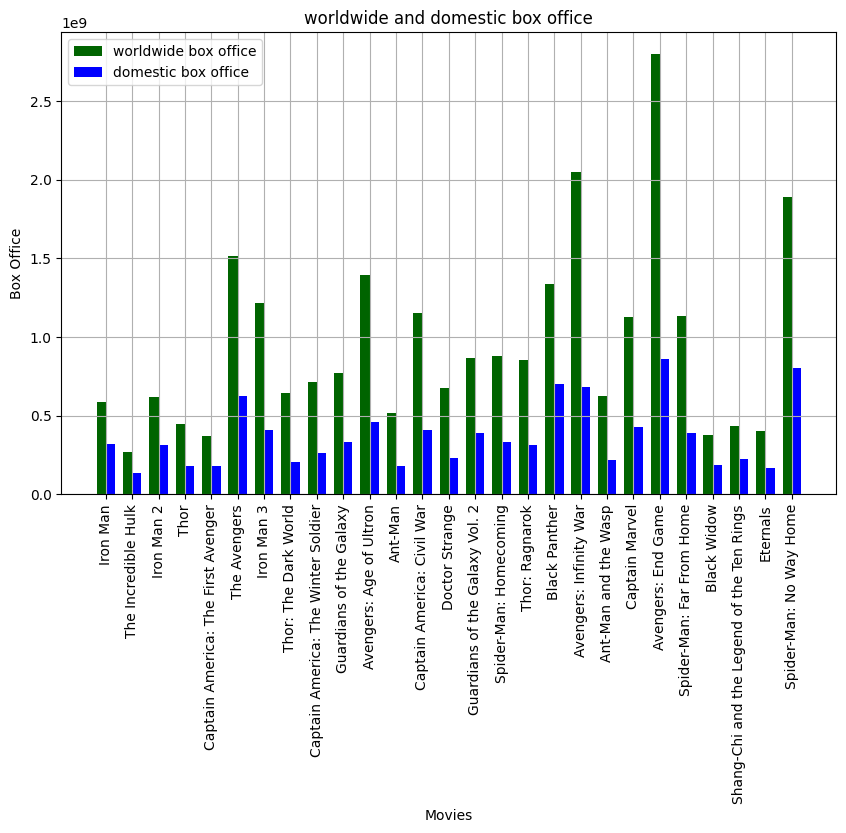

In [ ]:
movies=ds['movie_title']
globalm=ds['worldwide_box_office']
domesticm=ds['domestic_box_office']

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(movies))

plt.bar(index, globalm, bar_width, label='worldwide box office', color='darkgreen')
plt.bar([i + bar_width for i in index], domesticm, bar_width, label='domestic box office', color='blue')

# Adding labels and title
plt.xlabel('Movies')
plt.ylabel('Box Office')
plt.title('worldwide and domestic box office')
plt.xticks([i + bar_width / 2 for i in index], movies, rotation=90)
plt.legend()
plt.grid()